In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [4]:
dataFrame = pd.read_excel("mercedes.xlsx")

In [5]:
dataFrame

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
...,...,...,...,...,...,...,...
13114,2020,35999,Automatic,500,145,55.4,2.0
13115,2020,24699,Automatic,2500,145,55.4,2.0
13116,2019,30999,Automatic,11612,145,41.5,2.1
13117,2019,37990,Automatic,2426,145,45.6,2.0


In [6]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [7]:
#null değerleri temizleme
dataFrame = dataFrame.dropna(axis=0) #null içeren satırları sil
dataFrame

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
...,...,...,...,...,...,...,...
13114,2020,35999,Automatic,500,145,55.4,2.0
13115,2020,24699,Automatic,2500,145,55.4,2.0
13116,2019,30999,Automatic,11612,145,41.5,2.1
13117,2019,37990,Automatic,2426,145,45.6,2.0


(array([2.792e+03, 8.199e+03, 1.594e+03, 3.930e+02, 9.100e+01, 1.800e+01,
        1.300e+01, 7.000e+00, 9.000e+00, 3.000e+00]),
 array([   650. ,  16584.9,  32519.8,  48454.7,  64389.6,  80324.5,
         96259.4, 112194.3, 128129.2, 144064.1, 159999. ]),
 <BarContainer object of 10 artists>)

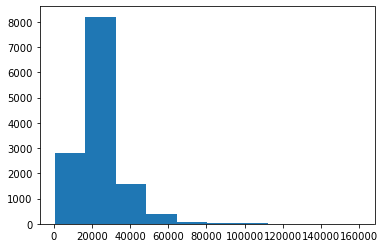

In [8]:
# veri dağılımını kontrol etme (histogram)
plt.hist(dataFrame["price"])

C:\Users\Mehmet KAHRAMAN\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

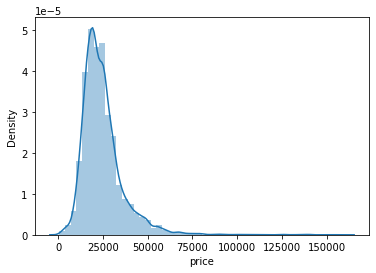

In [9]:
# veri dağılımını kontrol etme (distribution)
sbn.distplot(dataFrame["price"])

# çok pahalı arabalar azınlıkta, modelimizi olumsuz etkileyebilir
# fiyatı 75 bin'den pahalıları silsek iyi olur
# zira onlar için ayrı bir model oluşturulabilir

C:\Users\Mehmet KAHRAMAN\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

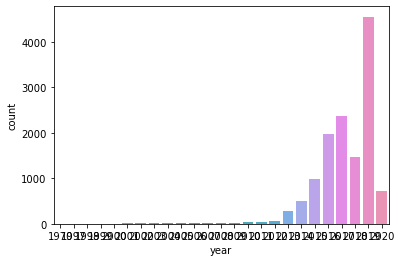

In [10]:
sbn.countplot(dataFrame["year"])

In [11]:
# Korelasyon analizi
# veri özellikleri arasında doğrusal bir ilişki olup olmadığını,
# varsa bu ilişkinin katsayısını veren matematiksel yöntemdir.
# örneğin araba yılı ile araba fiyatı arasında pozitif korelasyon vardır
# az da olsa hata oranı barındırır

dataFrame.corr()["price"].sort_values()   #fiyatı etkileyen korelasyonlar

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [12]:
# String Sütununu silme (Transmission sütunu)
dataFrame = dataFrame.drop("transmission", axis=1)
dataFrame

,year,price,mileage,tax,mpg,engineSize
0,2005,5200,63000,325,32.1,1.8
1,2017,34948,27000,20,61.4,2.1
2,2016,49948,6200,555,28.0,5.5
3,2016,61948,16000,325,30.4,4.0
4,2016,73948,4000,325,30.1,4.0
...,...,...,...,...,...,...
13114,2020,35999,500,145,55.4,2.0
13115,2020,24699,2500,145,55.4,2.0
13116,2019,30999,11612,145,41.5,2.1
13117,2019,37990,2426,145,45.6,2.0


In [13]:
# en pahalı arabaları listele
dataFrame.sort_values("price",ascending=False).head(50)

,year,price,mileage,tax,mpg,engineSize
6199,2020,159999,1350,145,21.4,4.0
10044,2020,154998,3000,150,21.4,4.0
5,2011,149948,3000,570,21.4,6.2
8737,2019,140319,785,150,22.1,4.0
6386,2018,139995,13046,145,21.4,4.0
8,2019,139948,12000,145,21.4,4.0
9133,2019,139559,1000,145,22.1,4.0
8821,2020,138439,1000,145,22.1,4.0
5902,2018,135771,19000,145,21.4,4.0
7864,2018,135124,18234,150,21.4,4.0


C:\Users\Mehmet KAHRAMAN\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

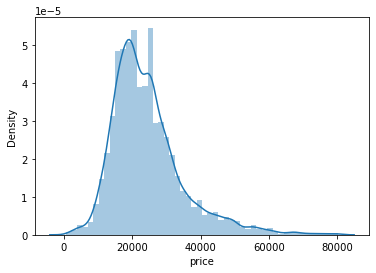

In [14]:
# fiyatı yüksek olanlara göre sıralanmış dataframe üzerinde,
# ilk 50 tanesini bırak 50.sıradan sonuna kadar dataFrame'i güncelle

dataFrame = dataFrame.sort_values("price",ascending=False).iloc[50:]
sbn.distplot(dataFrame["price"])

In [15]:
# araba yılına göre ortalama fiyatlar
dataFrame.groupby("year").mean()["price"]

# 1970 model arabaların ort fiyatı uyumsuz

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19307.892948
2017    21444.282472
2018    25119.638736
2019    30752.414952
2020    34948.455307
Name: price, dtype: float64

In [16]:
# bozuk veriyi sorgulayarak silme
dataFrame = dataFrame.query("year != 1970")
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19307.892948
2017    21444.282472
2018    25119.638736
2019    30752.414952
2020    34948.455307
Name: price, dtype: float64

In [17]:
# x (özellikler) ve y (label hedefi) değerlerini oluşturma

y = dataFrame["price"].values
x = dataFrame.drop("price",axis=1).values

In [18]:
# veri setinin test-train oranına ayrılması

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [19]:
# veri ölçeklendirme

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
# modeli oluşturma

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
# 5 araba özelliği olduğundan bir katmanda en az 5 nöron olmalı

model.add(layers.Dense(12, activation="relu"))
model.add(layers.Dense(12, activation="relu"))
model.add(layers.Dense(12, activation="relu"))
model.add(layers.Dense(12, activation="relu"))
model.add(layers.Dense(1))

model.compile(optimizer="adam",loss="mse")

In [21]:
# modeli eğitme

#validation --> ek olarak test verilerine göre de loss oranını çıkar
model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=500, epochs=400)

Epoch 1/400
19/19 [==============================] - 0s 16ms/step - loss: 711546240.0000 - val_loss: 689768064.0000
Epoch 2/400
19/19 [==============================] - 0s 4ms/step - loss: 711519552.0000 - val_loss: 689735552.0000
Epoch 3/400
19/19 [==============================] - 0s 4ms/step - loss: 711475328.0000 - val_loss: 689674048.0000
Epoch 4/400
19/19 [==============================] - 0s 4ms/step - loss: 711389760.0000 - val_loss: 689553152.0000
Epoch 5/400
19/19 [==============================] - 0s 4ms/step - loss: 711220096.0000 - val_loss: 689312256.0000
Epoch 6/400
19/19 [==============================] - 0s 4ms/step - loss: 710876736.0000 - val_loss: 688829632.0000
Epoch 7/400
19/19 [==============================] - 0s 4ms/step - loss: 710216512.0000 - val_loss: 687935104.0000
Epoch 8/400
19/19 [==============================] - 0s 3ms/step - loss: 709013056.0000 - val_loss: 686328320.0000
Epoch 9/400
19/19 [==============================] - 0s 4ms/step - loss: 706915

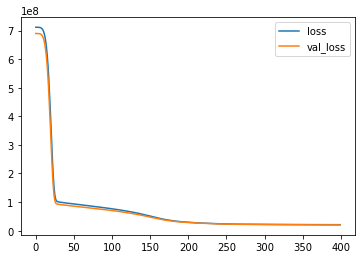

In [22]:
# Loss değerlerinin minimize olma eğrisi

loss_df = model.history.history

loss_train = loss_df["loss"]     # type --> liste
loss_train = np.array(loss_train)   # train verisine göre loss
loss_test = loss_df["val_loss"]    # test verisine göre validasyon loss
loss_test = np.array(loss_test)

axis = range(0,400)   # epoch --> 400
plt.plot(axis,loss_train, label="loss")
plt.plot(axis,loss_test, label="val_loss")
plt.legend()

In [23]:
# Tahminler

tahminler = model.predict(x_test)
sayı = tahminler.shape[0]
tahminler = pd.Series(tahminler.reshape(sayı,))

resultFrame = pd.DataFrame(y_test,columns=["Gerçek Fiyat"])
resultFrame["Tahmin"] = tahminler
resultFrame

,Gerçek Fiyat,Tahmin
0,23780,20585.091797
1,14991,14599.619141
2,21498,22662.232422
3,13000,14559.989258
4,17000,19074.125000
...,...,...
3916,14990,17351.855469
3917,17299,20213.093750
3918,24810,22377.546875
3919,20640,21893.986328


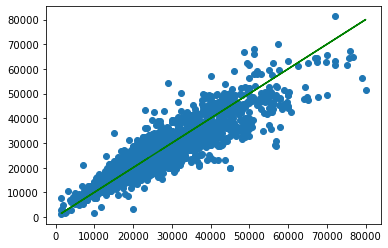

In [24]:
plt.scatter(y_test,tahminler)
plt.plot(y_test,y_test,color="green")

In [25]:
# Hata oranı değerlendirilmesi

from sklearn.metrics import mean_absolute_error

sapma = round(mean_absolute_error(resultFrame["Gerçek Fiyat"],resultFrame["Tahmin"]))
ort_fiyat = round(dataFrame["price"].mean())

# yüzde hesabı
# 24078 pound fiyatta 3170 pound sapıyorsa % yüzde kaç sapar?
yuzde_sapma = (100 * sapma) / ort_fiyat
dogruluk_oranı = round(100 - yuzde_sapma)

dogruluk_oranı  # --> %87

87

In [26]:
deneme = pd.Series([2019,1000,145,22.1,4.0])   # gerçek fiyat --> 75729 
deneme = scaler.transform(deneme.values.reshape(-1,5))   # 5 özelliği matrise çevir
model.predict(deneme)

array([[64345.66]], dtype=float32)